In [44]:
%load_ext autoreload
%autoreload

import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from equationmodel_ann import ann_mlp_regression, prediction_rmse_error, ann_train_graph, ann_linear_compare_graph
from util import ADD_data_loader, combineDF, filteringDF, getFreeSpacePathLoss, makeXforGraph

desired_width=620
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns',30)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
%autoreload

iksan_fileList = {'../data/PLdata_iksan_wt_400.csv':[('frequency', 400), ('heightTB',30), ('heightB',15), ('heightM',2)],
            '../data/PLdata_iksan_wt_1399.csv':[('frequency', 1399), ('heightTB',30), ('heightB',15), ('heightM',2)],
            '../data/PLdata_iksan_wt_2249.csv':[('frequency', 2249), ('heightTB',30), ('heightB',15), ('heightM',2)]}
nonsan_fileList = {'../data/PLdata_nonsan_wt_400.csv':[('frequency', 400), ('heightTB',30), ('heightB',15), ('heightM',2)],
            '../data/PLdata_nonsan_wt_1399.csv':[('frequency', 1399), ('heightTB',30), ('heightB',15), ('heightM',2)],
            '../data/PLdata_nonsan_wt_2249.csv':[('frequency', 2249), ('heightTB',30), ('heightB',15), ('heightM',2)]}
paju_fileList = {'../data/PLdata_paju_wt_400.csv':[('frequency', 400), ('heightTB',100), ('heightB',7), ('heightM',2)],
            '../data/PLdata_paju_wt_1399.csv':[('frequency', 1399), ('heightTB',100), ('heightB',7), ('heightM',2)],
            '../data/PLdata_paju_wt_2249.csv':[('frequency', 2249), ('heightTB',100), ('heightB',7), ('heightM',2)]}

addIksan = ADD_data_loader(iksan_fileList)
addNonsan = ADD_data_loader(nonsan_fileList)
addPaju = ADD_data_loader(paju_fileList)

# print(addIksan.describe())
# print(addNonsan.describe())
# print(addPaju.describe())

addData = combineDF([addIksan, addNonsan, addPaju])
print("data count:",addData.count())
addData = filteringDF(addData, 'heightTM', [10,100])
print("data count:",addData.count())


addData['freePathloss'] = getFreeSpacePathLoss(addData['distance'],addData['frequency'])
addData = addData[addData['pathloss'] >= addData['freePathloss']]
print("data count:",addData.count())

print("ADD data sample:",addData.head())

print("ADD data description")
print(addData.describe())
print("Covariance Matrix - ADD data")
print(addData.cov())
print("--------------------------------------------------")

distance filtering(before): type        109060
distance    109060
pathloss    109060
heightTM    109060
dtype: int64
distance filtering(after): type        13178
distance    13178
pathloss    13178
heightTM    13178
dtype: int64
distance filtering(before): type        109210
distance    109210
pathloss    109210
heightTM    109210
dtype: int64
distance filtering(after): type        13240
distance    13240
pathloss    13240
heightTM    13240
dtype: int64
distance filtering(before): type        108873
distance    108873
pathloss    108873
heightTM    108873
dtype: int64
distance filtering(after): type        13109
distance    13109
pathloss    13109
heightTM    13109
dtype: int64
distance filtering(before): type        114545
distance    114545
pathloss    114545
heightTM    114545
dtype: int64
distance filtering(after): type        13456
distance    13456
pathloss    13456
heightTM    13456
dtype: int64
distance filtering(before): type        114455
distance    114455
pathloss    114455

In [88]:
%autoreload

X = np.array(addData[['logDistance', 'logFrequency', 'logHeightB', 'logHeightM', 'logHeightTratio', 'logAntennaMulLogDistance']])
Y = np.array(addData[['pathloss']])

kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(X)


modelList = []
dataSet = []
i = 1
for train_index, test_index in kf.split(X):
#     print("TRAIN index:", train_index, "TEST index:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    model = ann_mlp_regression(X_train, y_train.flatten(), (60,), activation='logistic', optimizer='lbfgs')

#     trainError = prediction_rmse_error(model.predict(X_train), y_train)
#     testError = prediction_rmse_error(model.predict(X_test), y_test)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    trainError = np.sqrt(mean_squared_error(y_train, pred_train))
    testError = np.sqrt(mean_squared_error(y_test, pred_test))

    print("ANN-Model-"+str(i)+"-train error(RMSE):", trainError)
    print("ANN-Model-"+str(i)+"-test error(RMSE):", testError)    
    
    dataSet.append([X_train,y_train,X_test,y_test, trainError, testError])
    
    modelList.append(model)
    filename = 'model/ann_model_' + str(i) + '.sav'
    pickle.dump(modelList[-1], open(filename, 'wb'))
    i+=1

loss: 62.697480764477575
ANN-Model-1-train error(RMSE): 11.197977547669216
ANN-Model-1-test error(RMSE): 11.239092694438947
loss: 58.9880849189324
ANN-Model-2-train error(RMSE): 10.861681622520234
ANN-Model-2-test error(RMSE): 10.928463634419197
loss: 60.91157744602902
ANN-Model-3-train error(RMSE): 11.037346885215564
ANN-Model-3-test error(RMSE): 11.022225808541561
loss: 58.73815392559279
ANN-Model-4-train error(RMSE): 10.83864617896672
ANN-Model-4-test error(RMSE): 10.750800602442505
loss: 57.54363036779065
ANN-Model-5-train error(RMSE): 10.727870607908663
ANN-Model-5-test error(RMSE): 10.775089596640274


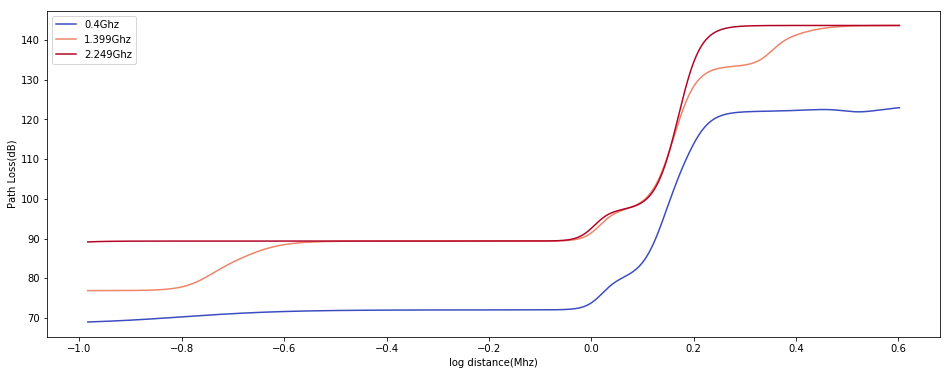

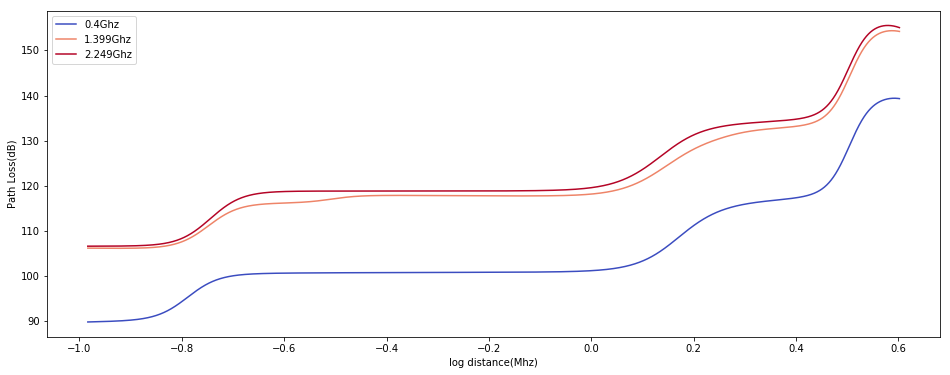

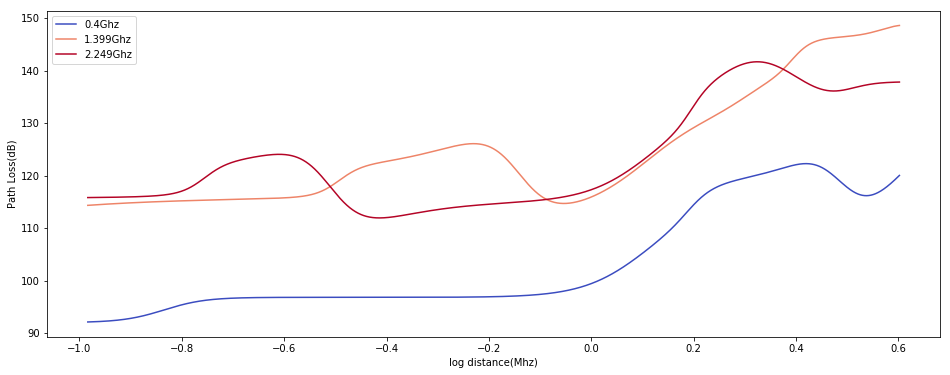

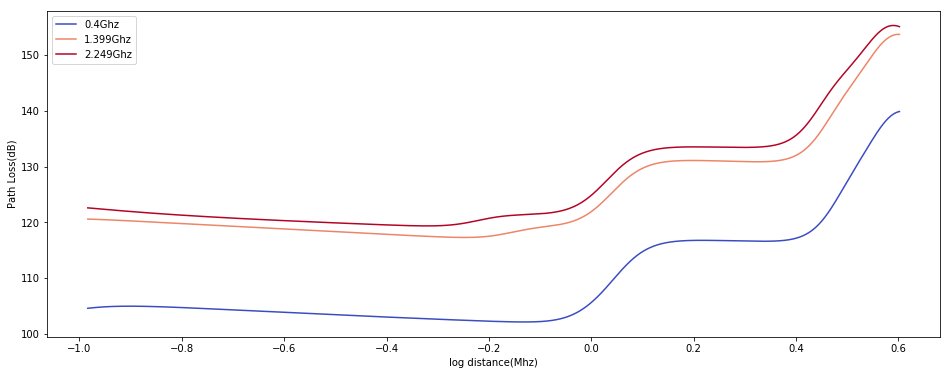

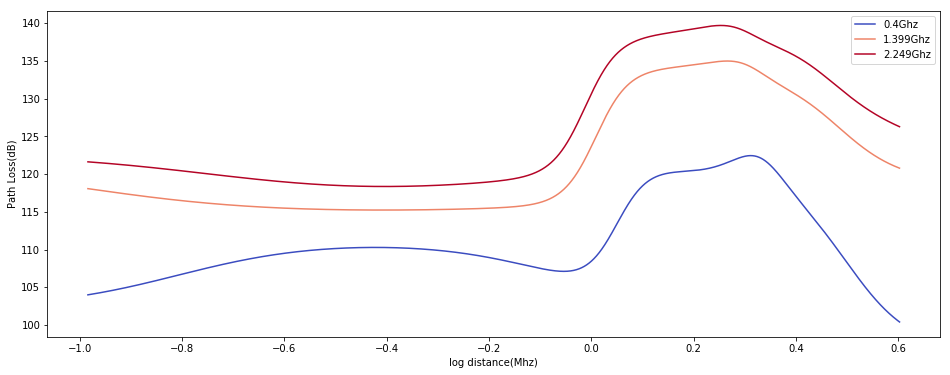

In [89]:
%autoreload
i = 1
for X_train,y_train,X_test,y_test, trainError, testError in dataSet:
    
    data = makeXforGraph(pd.DataFrame(X_train, columns=['logDistance', 'logFrequency', 'logHeightB', 'logHeightM', 'logHeightTratio', 'logAntennaMulLogDistance']),
                         pd.DataFrame(y_train, columns=['pathloss']),
                         [np.log10(400), np.log10(1399), np.log10(2249)])

    model = pickle.load(open("model/ann_model_"+ str(i) +".sav", 'rb'))

    graphX = data[0]
    graphY = data[1]
    ann_train_graph(model, graphX, graphY)
    i+=1

In [90]:
%autoreload

#['logDistance', 'logFrequency', 'logHeightB', 'logHeightM', 'logHeightTratio', 'logAntennaMulLogDistance']

i = 1
for X_train,y_train,X_test,y_test, trainError, testError in dataSet:   
    print("<ANN model #" + str(i) + ">")
    print("========================================")
    ANNmodel = pickle.load(open("model/ann_model_"+ str(i) +".sav", 'rb')) 
    
    ANNPred = model.predict(X_train)
    
    linearModel = LinearRegression().fit(X_train, ANNPred)
    
    filename = 'model/linear_model_' + str(i) + '.sav'
    pickle.dump(linearModel, open(filename, 'wb'))
    
    linearPred = linearModel.predict(X_train)
    print("score:",linearModel.score(X_train, y_train))
    print("coefficient:",linearModel.coef_)
    print("intercept:",linearModel.intercept_)
    
    similarity = np.sqrt(mean_squared_error(ANNPred, linearPred))
    RMSE = np.sqrt(mean_squared_error(y_train, linearPred))
    print("Similarity(ANN-MultiLinear):", similarity)
    print("RMSE with true pathloss:", RMSE)
    print("L_pathloss = {:6.2f}log_d + {:6.2f}log_f + {:6.2f}log_hb + {:6.2f}log_hm + {:6.2f}log_(h_tb/h_tbm) + {:6.2f}log_d*log_hb + {:6.2f}".format(linearModel.coef_[0],linearModel.coef_[1],linearModel.coef_[2],linearModel.coef_[3],linearModel.coef_[4],linearModel.coef_[5],linearModel.intercept_))
    i+=1

<ANN model #1>
score: 0.4683271520000524
coefficient: [  0.61949136  25.57070572 -15.39385612  -5.93947103  15.12868277
  25.7890292 ]
intercept: 108.25253278235405
Similarity(ANN-MultiLinear): 5.7095586321312215
RMSE with true pathloss: 12.154473430038832
L_pathloss =   0.62log_d +  25.57log_f + -15.39log_hb +  -5.94log_hm +  15.13log_(h_tb/h_tbm) +  25.79log_d*log_hb + 108.25
<ANN model #2>
score: 0.4670243239532075
coefficient: [  0.5822967   25.62925934 -15.90830406  -3.17379184  15.43247755
  25.77705846]
intercept: 108.79483891175896
Similarity(ANN-MultiLinear): 5.7111618325603315
RMSE with true pathloss: 12.153628320074656
L_pathloss =   0.58log_d +  25.63log_f + -15.91log_hb +  -3.17log_hm +  15.43log_(h_tb/h_tbm) +  25.78log_d*log_hb + 108.79
<ANN model #3>
score: 0.4685066578559286
coefficient: [  0.46895159  25.61126718 -15.64716743  -4.17833253  15.30034217
  25.92787721]
intercept: 108.43089988848843
Similarity(ANN-MultiLinear): 5.70557770152715
RMSE with true pathloss: 12

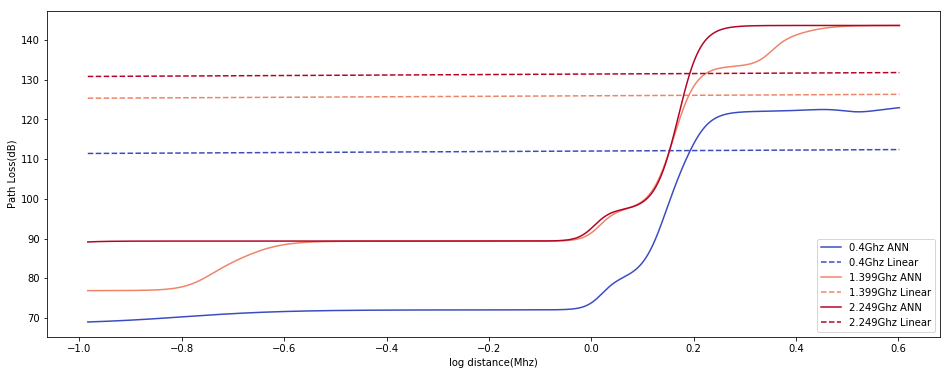

Similarity(ANN-MultiLinear): 4.8371844950878815
L_pathloss =   0.50log_d +  25.57log_f + -15.66log_hb +  -4.52log_hm +  15.34log_(h_tb/h_tbm) +  25.97log_d*log_hb + 108.78


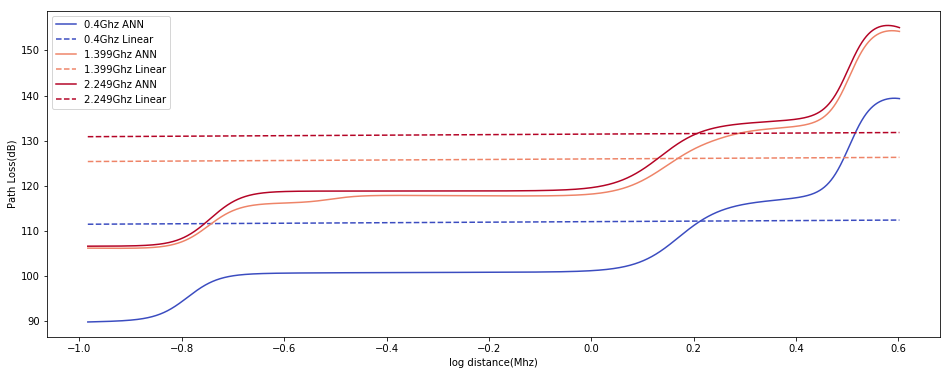

Similarity(ANN-MultiLinear): 5.2955056435330485
L_pathloss =   0.50log_d +  25.57log_f + -15.66log_hb +  -4.52log_hm +  15.34log_(h_tb/h_tbm) +  25.97log_d*log_hb + 108.78


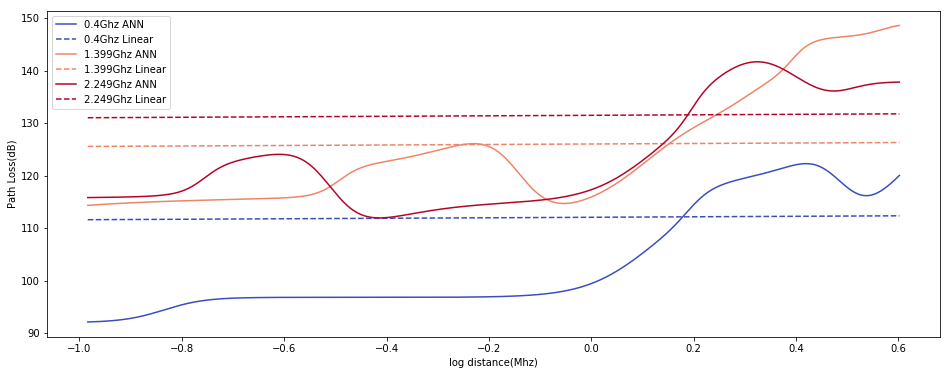

Similarity(ANN-MultiLinear): 5.055705937474011
L_pathloss =   0.50log_d +  25.57log_f + -15.66log_hb +  -4.52log_hm +  15.34log_(h_tb/h_tbm) +  25.97log_d*log_hb + 108.78


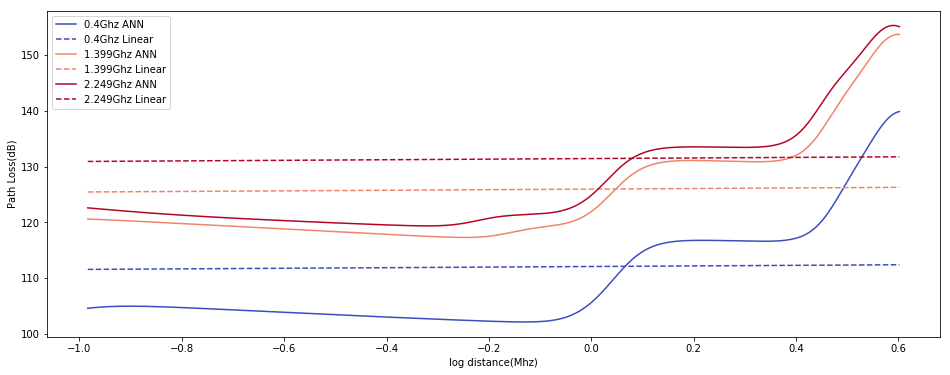

Similarity(ANN-MultiLinear): 5.475661620406094
L_pathloss =   0.50log_d +  25.57log_f + -15.66log_hb +  -4.52log_hm +  15.34log_(h_tb/h_tbm) +  25.97log_d*log_hb + 108.78


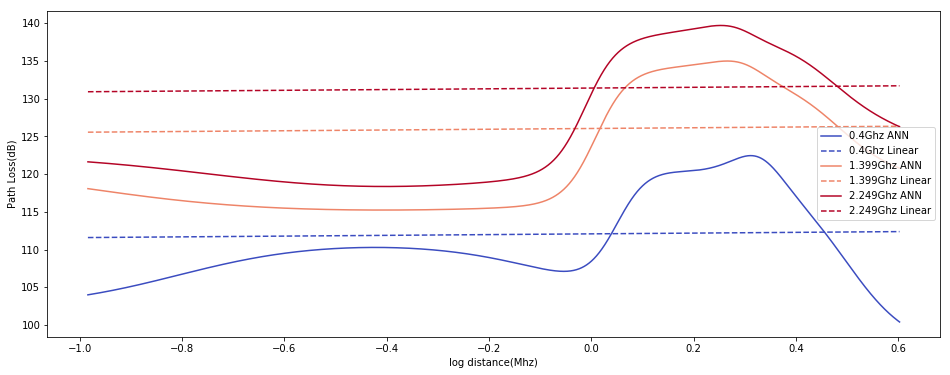

Similarity(ANN-MultiLinear): 5.712049987154433
L_pathloss =   0.50log_d +  25.57log_f + -15.66log_hb +  -4.52log_hm +  15.34log_(h_tb/h_tbm) +  25.97log_d*log_hb + 108.78


In [91]:
%autoreload
i = 1
for X_train,y_train,X_test,y_test, trainError, testError in dataSet:
    
    data = makeXforGraph(pd.DataFrame(X_train, columns=['logDistance', 'logFrequency', 'logHeightB', 'logHeightM', 'logHeightTratio', 'logAntennaMulLogDistance']),
                         pd.DataFrame(y_train, columns=['pathloss']),
                         [np.log10(400), np.log10(1399), np.log10(2249)])

    ANNmodel = pickle.load(open("model/ann_model_"+ str(i) +".sav", 'rb'))
    ANNPred = ANNmodel.predict(X_train)
    LinearModel = pickle.load(open("model/linear_model_"+ str(i) +".sav", 'rb'))
    linearPred = linearModel.predict(X_train)
    
    graphX = data[0]
    graphY = data[1]
    ann_linear_compare_graph(ANNmodel, LinearModel, graphX, graphY)
#     print("coefficient:",linearModel.coef_)
#     print("intercept:",linearModel.intercept_)
    
    similarity = np.sqrt(mean_squared_error(ANNPred, linearPred))
    print("Similarity(ANN-MultiLinear):", similarity)
    
    print("L_pathloss = {:6.2f}log_d + {:6.2f}log_f + {:6.2f}log_hb + {:6.2f}log_hm + {:6.2f}log_(h_tb/h_tbm) + {:6.2f}log_d*log_hb + {:6.2f}".format(linearModel.coef_[0],linearModel.coef_[1],linearModel.coef_[2],linearModel.coef_[3],linearModel.coef_[4],linearModel.coef_[5],linearModel.intercept_))

    i+=1

In [92]:
%autoreload
i = 1
for X_train,y_train,X_test,y_test, trainError, testError in dataSet:
    ndeg = 2
    polynomial_model = None
    polynomial_features = None
    X_train_poly = None
    polynomial_features = PolynomialFeatures(degree=ndeg)
    X_train_poly = polynomial_features.fit_transform(X_train)
    
    ANNmodel = pickle.load(open("model/ann_model_"+ str(i) +".sav", 'rb'))
    ANNpred = ANNmodel.predict(X_train)
    
    polynomial_model =  LinearRegression(fit_intercept=False).fit(X_train_poly, ANNpred)
    
    PolyPred = polynomial_model.predict(X_train_poly)
    
    similarity = np.sqrt(mean_squared_error(PolyPred, ANNpred))
    print("Similarity(ANN-Poly):", similarity)
    # (a,b) => a, b, a^2, ab, b^2
    # (a, b, c, d, e, f) => 1, a, b, c
    #                       d, e, f, a^2
    #                       b^2, c^2, d^2, e^2
    #                       f^2, ab, ac, ad,
    #                       be, bf, cd, ce,
    #                       cf, de, df, ef,
    print("L_pathloss = {:6.2f}log_d + {:6.2f}log_f + {:6.2f}log_hb + {:6.2f}log_hm+ {:6.2f}log_(h_tb/h_tm) + {:6.2f}log_d*log_hb +{:6.2f}(log_d)^2 + {:6.2f}(log_f)^2 + {:6.2f}(log_hb)^2 + {:6.2f}log_hm^2 + {:6.2f}(log_(h_tb/h_tm))^2 + {:6.2f}(log_d*log_hb)^2 + {:6.2f}log_d*log_f + {:6.2f}log_d*log_hb + {:6.2f}log_d*log_hm + {:6.2f}log_d*log_(h_tb/h_tm)+ {:6.2f}log_d*log_d*log_hb + {:6.2f}log_f*log_hb + {:6.2f}log_f*log_hm + {:6.2f}log_f*log_(h_tb/h_tm)+ {:6.2f}log_f*log_d*log_hb + {:6.2f}log_hb*log_hm + {:6.2f}log_hb*log_(h_tb/h_tm) + {:6.2f}log_hb*log_d*log_hb + {:6.2f}log_hm*log_(h_tb/h_tm) + {:6.2f}log_hm*log_d*log_hb + {:6.2f}log_(h_tb/h_tm)*log_d*log_hb + {:6.2f}".format(polynomial_model.coef_[0],polynomial_model.coef_[1],polynomial_model.coef_[2],polynomial_model.coef_[3],polynomial_model.coef_[4],polynomial_model.coef_[5],polynomial_model.coef_[6],polynomial_model.coef_[7],polynomial_model.coef_[8],polynomial_model.coef_[9],polynomial_model.coef_[10],polynomial_model.coef_[11],polynomial_model.coef_[12],polynomial_model.coef_[13],polynomial_model.coef_[14],polynomial_model.coef_[15],polynomial_model.coef_[16],polynomial_model.coef_[17],polynomial_model.coef_[18],polynomial_model.coef_[19],polynomial_model.coef_[20],polynomial_model.coef_[21],polynomial_model.coef_[22],polynomial_model.coef_[23],polynomial_model.coef_[24],polynomial_model.coef_[25],polynomial_model.coef_[26],polynomial_model.coef_[27],polynomial_model.intercept_))
    print()
    i+=1

Similarity(ANN-Poly): 4.2155827155864465
L_pathloss = 604529907376.47log_d + -1231144838.91log_f + -1051923228885.07log_hb + -754053172093.29log_hm+ -513773512169.52log_(h_tb/h_tm) + -53804405456.41log_d*log_hb +657208751.77(log_d)^2 + -951533518.09(log_f)^2 +  16.84(log_hb)^2 + 2983022067.77log_hm^2 + -2038202772.28(log_(h_tb/h_tm))^2 + -49.55(log_d*log_hb)^2 + 1935008802.53log_d*log_f + -28.46log_d*log_hb +  11.78log_d*log_hm + 3494413328284.46log_d*log_(h_tb/h_tm)+  -1.00log_d*log_d*log_hb +  -8.89log_f*log_hb + 479376245610.37log_f*log_hm + -713739391127.71log_f*log_(h_tb/h_tm)+  -1.68log_f*log_d*log_hb + -1856003435.08log_hb*log_hm + 293418786167.78log_hb*log_(h_tb/h_tm) + 178734366280.92log_hb*log_d*log_hb + 369078490.34log_hm*log_(h_tb/h_tm) +   4.95log_hm*log_d*log_hb +  73.23log_(h_tb/h_tm)*log_d*log_hb + -957361463.70

Similarity(ANN-Poly): 4.72856125177426
L_pathloss = 132395773300.31log_d + 2395881404.97log_f + -228456098180.16log_hb + -170773978389.78log_hm+ -104574815649.